# plot timecourse data

### import modules

In [1]:
from surfer import Brain, Surface
from mayavi import mlab
mlab.init_notebook()

import numpy as np
import pandas as pd
from sklearn import preprocessing

from nilearn import plotting
from nilearn.plotting.surf_plotting import load_surf_data

%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns
sns.set_style('dark')

Notebook initialized with x3d backend.


In [2]:
# crop image (taken from https://github.com/mwaskom/Waskom_CerebCortex_2017/blob/master/dimensionality_reduction.ipynb)
def crop(arr):
    x, y = np.argwhere((arr != 255).any(axis=-1)).T
    return arr[x.min() - 20:x.max() + 20, y.min() - 20:y.max() + 20, :]

### load atlas

In [3]:
%%bash

cat ../fsData/label/aparc.annot.DKTatlas40.ctab

  0  unknown                          25   5  25    0
  1  bankssts                         25 100  40    0
  2  caudalanteriorcingulate         125 100 160    0
  3  caudalmiddlefrontal             100  25   0    0
  4  corpuscallosum                  120  70  50    0
  5  cuneus                          220  20 100    0
  6  entorhinal                      220  20  10    0
  7  fusiform                        180 220 140    0
  8  inferiorparietal                220  60 220    0
  9  inferiortemporal                180  40 120    0
 10  isthmuscingulate                140  20 140    0
 11  lateraloccipital                 20  30 140    0
 12  lateralorbitofrontal             35  75  50    0
 13  lingual                         225 140 140    0
 14  medialorbitofrontal             200  35  75    0
 15  middletemporal                  160 100  50    0
 16  parahippocampal                  20 220  60    0
 17  paracentral                      60 220  60    0
 18  parsopercularis        

In [4]:
atlasData = load_surf_data('../fsData/label/rh.aparc.DKTatlas40.annot')

In [5]:
fusiRoi= (atlasData==7)

/opt/anaconda2/lib/python2.7/site-packages/mayavi/tools/camera.py:288: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if focalpoint is not None and not focalpoint == 'auto':


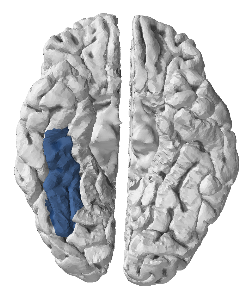

In [6]:
fig,ax = plt.subplots(1,1,figsize=(8,5))

b = Brain('pBrain', 'both', 'pial',background='white',size=1000)
b.add_data(fusiRoi,colorbar=False,colormap='Blues',hemi='rh',thresh=0.1,alpha=0.7)
b.show_view(dict(azimuth=0, elevation=180,
                         focalpoint=[0, 0,-50]))
    
im = crop(b.screenshot())
ax.imshow(im);
ax.set_xticks([]);ax.set_yticks([]);
plt.show()

### load tMap

In [7]:
tData = load_surf_data('../landscapes/Sess01/bold/design.sm5.rh/act-vs-rest/t.nii.gz')

In [8]:
tData.shape

(111586,)

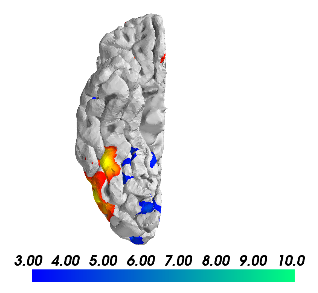

In [9]:
fig,ax = plt.subplots(1,1,figsize=(8,5))

b = Brain('pBrain', 'rh', 'pial',background='white',size=1000)
b.add_data(tData,hemi='rh',thresh=3,min=3,max=10,colorbar=True,colormap='autumn')
b.add_data(tData*(-1),hemi='rh',thresh=3,min=3,max=10,colorbar=True,colormap='winter')
b.show_view(dict(azimuth=0, elevation=180,focalpoint=[0, 0,-150]))
    
im = crop(b.screenshot())
ax.imshow(im);
ax.set_xticks([]);ax.set_yticks([]);
plt.show()

### find peak

get the index of the vertex with the highest t-Value in the fusiform gryus

In [10]:
tData[fusiRoi==False] = 0

In [11]:
maxLoc = np.where(tData==tData.max())[-1][-1]

In [12]:
maxLoc

38636

### show the peak

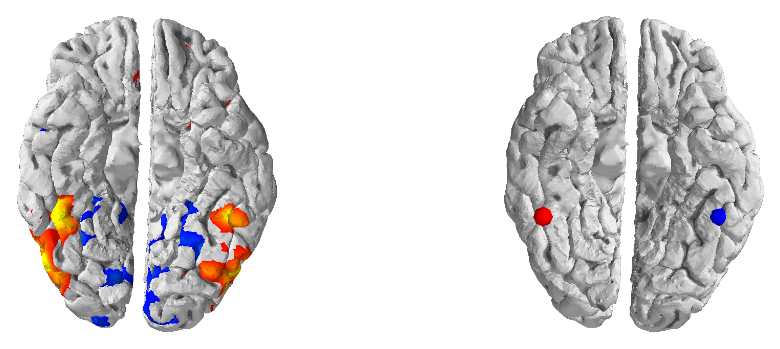

In [13]:
fig = plt.figure(figsize=(16,6))

ax = plt.subplot(1,2,1)
b = Brain('pBrain', 'both', 'pial',background='white',size=1000)

for h in ['lh','rh']:
    tData = load_surf_data('../landscapes/Sess01/bold/design.sm5.%s/act-vs-rest/t.nii.gz'%h)
    b.add_data(tData,hemi=h,thresh=3,min=3,max=10,colorbar=False,colormap='autumn')
    b.add_data(tData*(-1),hemi=h,thresh=3,min=3,max=10,colorbar=False,colormap='winter')
    
b.show_view(dict(azimuth=0, elevation=180,focalpoint=[0, 0,-150]))    
im = crop(b.screenshot())
ax.imshow(im);
ax.set_xticks([]);ax.set_yticks([]);

ax = plt.subplot(1,2,2)
b = Brain('pBrain', 'both', 'pial',background='white',size=1000)

for h in ['lh','rh']:
    atlasData = load_surf_data('../fsData/label/%s.aparc.DKTatlas40.annot'%h)
    fusiRoi= (atlasData==7)
    tData = load_surf_data('../landscapes/Sess01/bold/design.sm5.%s/act-vs-rest/t.nii.gz'%h)
    tData[fusiRoi==False] = 0
    maxLoc = np.where(tData==tData.max())[-1][-1]
    b.add_foci(np.array([maxLoc]),coords_as_verts=True,color={'lh':'blue','rh':'red'}[h],hemi=h)

    b.show_view(dict(azimuth=0, elevation=180,focalpoint=[0, 0,-150]))
im = crop(b.screenshot())
ax.imshow(im);
ax.set_xticks([]);ax.set_yticks([]);

plt.show()

### get the timecourse of the peak

In [14]:
timeSeries = load_surf_data('../landscapes/Sess01/bold/003/fmcpr.sm5.pBrain.rh.nii.gz')
preprocessing.scale(timeSeries,axis=1,copy=False);

/opt/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:181: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [15]:
timeSeries.shape

(111586, 167)

In [16]:
maxVertexTime = timeSeries[maxLoc]

In [17]:
maxVertexTime

array([-1.36185086, -0.16848579,  1.36721921,  0.6698392 ,  0.38665867,
       -0.30683166, -0.54730421,  0.03798673,  0.15885016,  0.22809248,
       -1.19973886,  1.25144553,  2.0308404 ,  0.48908079,  1.04118586,
        1.88523984,  1.93980384,  1.71209192,  1.10416245,  0.27314037,
        0.6000421 , -0.28022504, -0.91571397, -1.16801834, -0.61614245,
       -1.11748266, -1.2352103 , -0.65698105, -1.37891126,  0.08257028,
       -1.10587394, -0.17302074,  1.03937662,  1.24068713,  1.66086268,
        2.08082128,  1.23200917,  0.74228972,  0.9323653 ,  1.47695029,
        1.60229445,  0.53011233, -0.11430771, -1.25967598, -1.13281226,
       -0.84806371, -1.2298491 , -0.70620203, -0.47556528, -1.23372066,
       -0.75378275,  1.52072573,  1.9972384 ,  1.9744612 ,  1.43808365,
        0.87734896,  0.7823866 ,  1.99910784,  0.41822231,  0.83355546,
        0.55546463,  0.57915246, -0.92459691, -0.84624851, -0.78758979,
       -0.98721164, -1.27812934, -0.03307677,  0.54490519,  0.04

### plot the timecourses

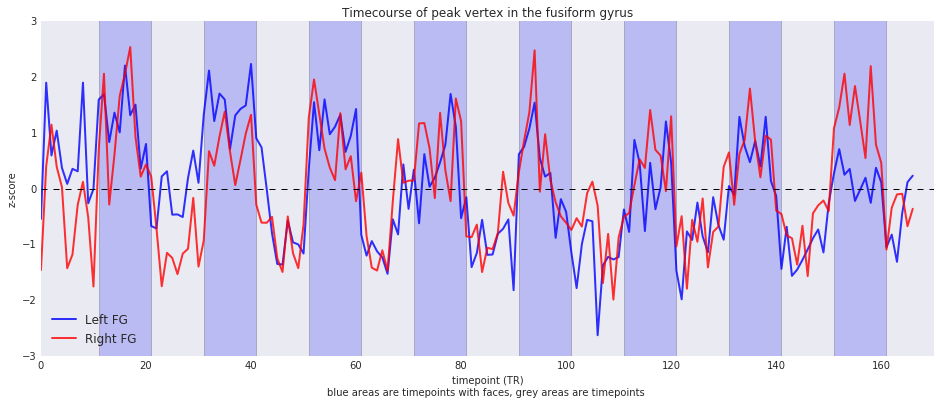

In [18]:
fig,ax = plt.subplots(1,1,figsize=(16,6))

for h in ['lh','rh']:
    # get the FG definition
    atlasData = load_surf_data('../fsData/label/%s.aparc.DKTatlas40.annot'%h)
    fusiRoi= (atlasData==7)
    # get the tMap
    tData = load_surf_data('../hands/Sess01/bold/design.sm5.%s/act-vs-rest/t.nii.gz'%h)
    # get the overlap
    tData[fusiRoi==False] = 0
    # get the peak
    maxLoc = np.where(tData==tData.max())[-1][-1]
    
    # get the timeseries for all vertices
    timeSeries = load_surf_data('../landscapes/Sess01/bold/003/fmcpr.sm5.pBrain.%s.nii.gz'%h)
    preprocessing.scale(timeSeries,axis=1,copy=False);
    
    # get the timeseries of the peak
    maxVertexTime = timeSeries[maxLoc]
    
    plt.plot(maxVertexTime,c={'lh':'b','rh':'r'}[h],linewidth=2,alpha=0.8,label={'lh':'Left FG','rh':'Right FG'}[h])

for i in np.arange(10,170,20):
    ax.fill_between([i+1,i+10+1],[-5,-5],[5,5],alpha=0.2)
plt.ylim(-3,3)
plt.axhline(0,linewidth=1,c='k',linestyle='dashed')
plt.xlim(0,170)
plt.title('Timecourse of peak vertex in the fusiform gyrus')
plt.ylabel('z-score')
plt.xlabel('timepoint (TR)\nblue areas are timepoints with faces, grey areas are timepoints ')
plt.legend(loc='best')
plt.show()

### for face/hand paradigm

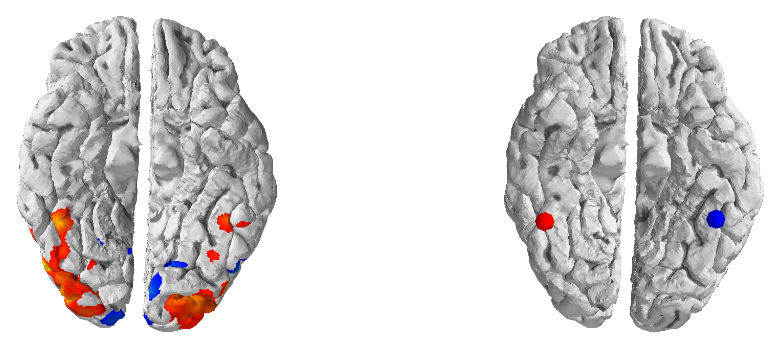

In [19]:
fig = plt.figure(figsize=(16,6))

ax = plt.subplot(1,2,1)
b = Brain('pBrain', 'both', 'pial',background='white',size=1000)

for h in ['lh','rh']:
    tData = load_surf_data('../hands/Sess01/bold/design.sm5.%s/act-vs-rest/t.nii.gz'%h)
    b.add_data(tData,hemi=h,thresh=3,min=3,max=10,colorbar=False,colormap='autumn')
    b.add_data(tData*(-1),hemi=h,thresh=3,min=3,max=10,colorbar=False,colormap='winter')
    
b.show_view(dict(azimuth=0, elevation=180,focalpoint=[0, 0,-150]))    
im = crop(b.screenshot())
ax.imshow(im);
ax.set_xticks([]);ax.set_yticks([]);

ax = plt.subplot(1,2,2)
b = Brain('pBrain', 'both', 'pial',background='white',size=1000)

for h in ['lh','rh']:
    atlasData = load_surf_data('../fsData/label/%s.aparc.DKTatlas40.annot'%h)
    fusiRoi= (atlasData==7)
    tData = load_surf_data('../hands/Sess01/bold/design.sm5.%s/act-vs-rest/t.nii.gz'%h)
    tData[fusiRoi==False] = 0
    maxLoc = np.where(tData==tData.max())[-1][-1]
    b.add_foci(np.array([maxLoc]),coords_as_verts=True,color={'lh':'blue','rh':'red'}[h],hemi=h)

    b.show_view(dict(azimuth=0, elevation=180,focalpoint=[0, 0,-150]))
im = crop(b.screenshot())
ax.imshow(im);
ax.set_xticks([]);ax.set_yticks([]);

plt.show()

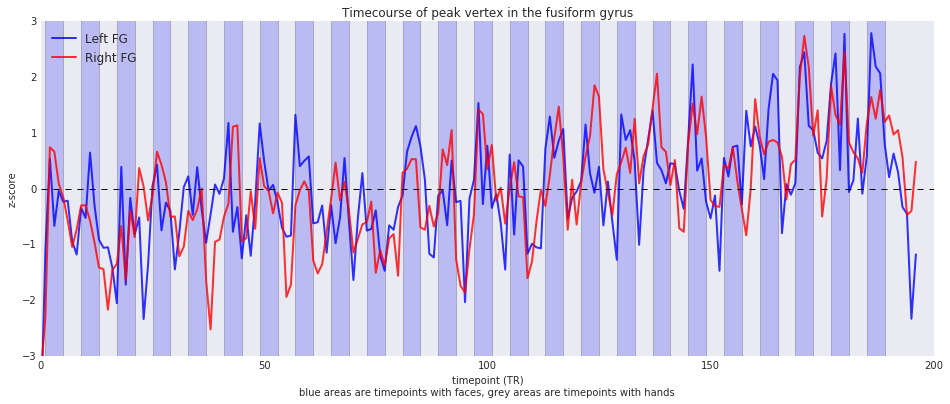

In [21]:
fig,ax = plt.subplots(1,1,figsize=(16,6))

for h in ['lh','rh']:
    atlasData = load_surf_data('../fsData/label/%s.aparc.DKTatlas40.annot'%h)
    fusiRoi= (atlasData==7)
    tData = load_surf_data('../hands/Sess01/bold/design.sm5.%s/act-vs-rest/t.nii.gz'%h)
    tData[fusiRoi==False] = 0
    maxLoc = np.where(tData==tData.max())[-1][-1]
    
    timeSeries = load_surf_data('../hands/Sess01/bold/005/fmcpr.sm5.pBrain.%s.nii.gz'%h)
    preprocessing.scale(timeSeries,axis=1,copy=False);
    
    maxVertexTime = timeSeries[maxLoc]
    
    plt.plot(maxVertexTime,c={'lh':'b','rh':'r'}[h],linewidth=2,alpha=0.8,label={'lh':'Left FG','rh':'Right FG'}[h])

for i in np.arange(0,192,8):
    ax.fill_between([i+1,i+4+1],[-5,-5],[5,5],alpha=0.2)
plt.ylim(-3,3)
plt.axhline(0,linewidth=1,c='k',linestyle='dashed')
plt.xlim(0,200)
plt.title('Timecourse of peak vertex in the fusiform gyrus')
plt.ylabel('z-score')
plt.xlabel('timepoint (TR)\nblue areas are timepoints with faces, grey areas are timepoints with hands')
plt.legend(loc='best')
plt.show()